In [91]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.decomposition import PCA


## 1. k-means Clustering on simulated data

#### Generate simulated dataset

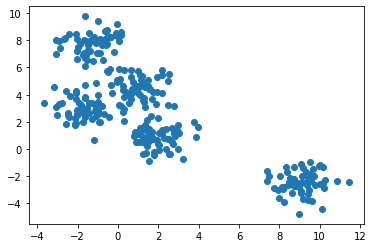

In [15]:
# set number of clusters
n_clusters = 5
cluster_sd = 0.8

# make fake data
X, y = make_blobs(n_samples=300, centers=n_clusters, cluster_std=cluster_sd, random_state=0)
plt.scatter(X[:,0], X[:,1])

In [71]:
# scale feature 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Set up k-means

ARI = 0.958551438547108


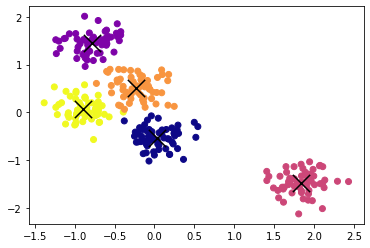

In [95]:
# use k-means to cluster

# set up params
k = 5
n_iter = 100
init_rounds = 10

# run clustering
kmeans = KMeans(n_clusters=k, init='k-means++', 
                max_iter=n_iter, n_init=init_rounds, random_state=0)

# predict clusters using trained k-means
pred_y = kmeans.fit_predict(X_scaled)

plt.scatter(X_scaled[:,0], X_scaled[:,1], c=pred_y, cmap="plasma")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=300, c='black', marker='x')

# check k-means performance for this dataset
print("ARI =", adjusted_rand_score(y, pred_y))

ARI = 0.4586164414246248


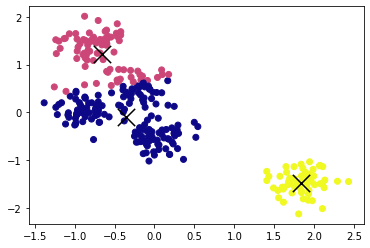

In [96]:
# try clustering for fewer clusters

# set up params
k = 3
n_iter = 100
init_rounds = 10

# run clustering
kmeans = KMeans(n_clusters=k, init='k-means++', 
                max_iter=n_iter, n_init=init_rounds, random_state=0)

# predict clusters using trained k-means
pred_y = kmeans.fit_predict(X_scaled)

plt.scatter(X_scaled[:,0], X_scaled[:,1], c=pred_y, cmap="plasma")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=300, c='black', marker='x')

print("ARI =", adjusted_rand_score(y, pred_y))

#### Check performance if we change k

ARI = 0.9015435547544112


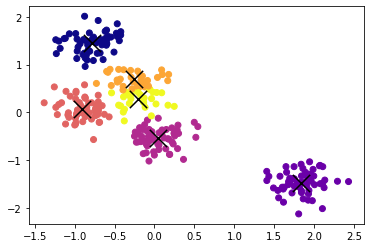

In [97]:
# try cluter into more clusters

k = 6
n_iter = 100
init_rounds = 10

# run clustering
kmeans = KMeans(n_clusters=k, init='k-means++', 
                max_iter=n_iter, n_init=init_rounds, random_state=0)

# predict clusters using trained k-means
pred_y = kmeans.fit_predict(X_scaled)

plt.scatter(X_scaled[:,0], X_scaled[:,1], c=pred_y, cmap="plasma")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=300, c='black', marker='x')

print("ARI =", adjusted_rand_score(y, pred_y))

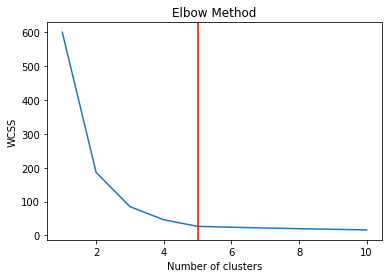

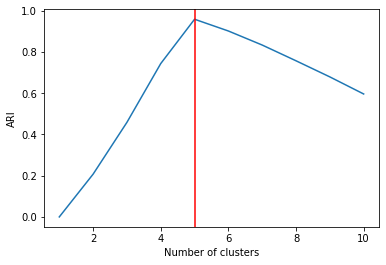

In [104]:
# try to identify best k

# compute and plot within-cluster sum of squares
wcss = []
ARI = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    y_pred = kmeans.fit_predict(X_scaled)
    wcss.append(kmeans.inertia_)
    ARI.append(adjusted_rand_score(y, y_pred))
    
# plot WCSS for different k
plt.plot(range(1, 11), wcss)
plt.axvline(x=5, c='red')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# plot ARI for different k
plt.plot(range(1, 11), ARI)
plt.axvline(ARI.index(max(ARI))+1, c='red')
plt.xlabel('Number of clusters')
plt.ylabel('ARI')
plt.show()

Because we are using a simulated dataset, we have "labels" to calculate ARI. For a real clustering problem, we won't have labels, and ARI won't be a relavent metric.

WCSS will always be available for clustering regardless of label. 

## 2. DBSCAN Clustering on simulated data

#### Set up DBSCAN

ARI = 0.789747428976713


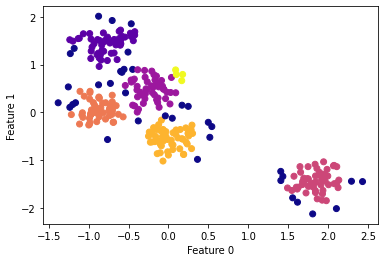

In [106]:
# cluster the data into five clusters
eps = 0.15
min_sample = 5
dbscan = DBSCAN(eps=eps, min_samples=min_sample)
clusters = dbscan.fit_predict(X_scaled)

# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

print("ARI =", adjusted_rand_score(y, clusters))

#### Check how parameter change leads to performance change

ARI = 0.20529543822603671


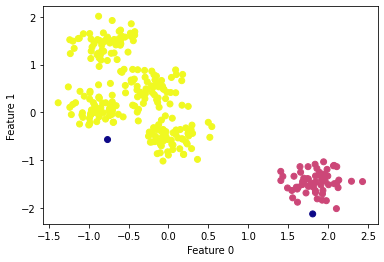

In [107]:
# indcrease eps-distance 
eps = 0.3
min_sample = 5
dbscan = DBSCAN(eps=eps, min_samples=min_sample)
clusters = dbscan.fit_predict(X_scaled)

# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

print("ARI =", adjusted_rand_score(y, clusters))

ARI = 0.42371537985518404


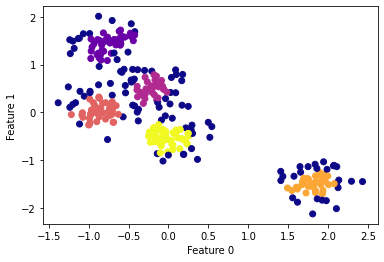

In [108]:
# increase density
eps = 0.15
min_sample = 10
dbscan = DBSCAN(eps=eps, min_samples=min_sample)
clusters = dbscan.fit_predict(X_scaled)

# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

print("ARI =", adjusted_rand_score(y, clusters))

#### Parameter tuning examples using ARI as optimized metric

In [112]:
# try to use performance to tune parameter
for eps in np.arange(0.1, 0.2, 0.01):
    for min_sample in range(3,10):
        dbscan = DBSCAN(eps=eps, min_samples=min_sample)
        clusters = dbscan.fit_predict(X_scaled)

        print("eps=",eps,"min_sample=",min_sample,"ARI =", adjusted_rand_score(y, clusters))

eps= 0.1 min_sample= 3 ARI = 0.5260173282733333
eps= 0.1 min_sample= 4 ARI = 0.321381065421425
eps= 0.1 min_sample= 5 ARI = 0.22191901075399564
eps= 0.1 min_sample= 6 ARI = 0.12071285072697822
eps= 0.1 min_sample= 7 ARI = 0.05977553415910223
eps= 0.1 min_sample= 8 ARI = 0.033967938607218695
eps= 0.1 min_sample= 9 ARI = 0.020419918640926574
eps= 0.11 min_sample= 3 ARI = 0.6504432529334464
eps= 0.11 min_sample= 4 ARI = 0.5396699188135109
eps= 0.11 min_sample= 5 ARI = 0.37766533279318454
eps= 0.11 min_sample= 6 ARI = 0.2514921731376076
eps= 0.11 min_sample= 7 ARI = 0.15015241640087
eps= 0.11 min_sample= 8 ARI = 0.08460987230659546
eps= 0.11 min_sample= 9 ARI = 0.04703636059802459
eps= 0.12 min_sample= 3 ARI = 0.7438039825931891
eps= 0.12 min_sample= 4 ARI = 0.6385468917447282
eps= 0.12 min_sample= 5 ARI = 0.4932060145363316
eps= 0.12 min_sample= 6 ARI = 0.3923472317448439
eps= 0.12 min_sample= 7 ARI = 0.2662916864671004
eps= 0.12 min_sample= 8 ARI = 0.19843322971647928
eps= 0.12 min_sampl

ARI = 0.9027144031703107


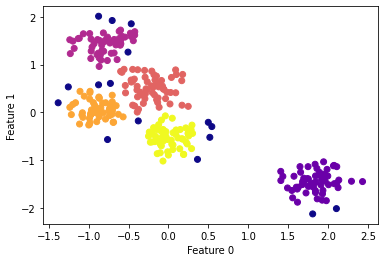

In [113]:
# use the best params combination
eps = 0.17
min_sample = 3
dbscan = DBSCAN(eps=eps, min_samples=min_sample)
clusters = dbscan.fit_predict(X_scaled)

# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

print("ARI =", adjusted_rand_score(y, clusters))

#### Parameter tuning using distance

Text(0, 0.5, 'Distance')

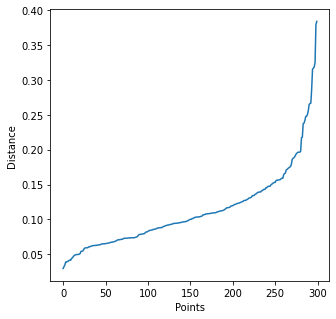

In [128]:
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator # need to install package kneed

# calculate distance for min_samples
nearest_neighbors = NearestNeighbors(n_neighbors=4)
neighbors = nearest_neighbors.fit(X_scaled)
distances, indices = neighbors.kneighbors(X_scaled)
distances = np.sort(distances[:,3], axis=0)

# plot it out
fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

optimal eps: 0.15646872662489691


<Figure size 360x360 with 0 Axes>

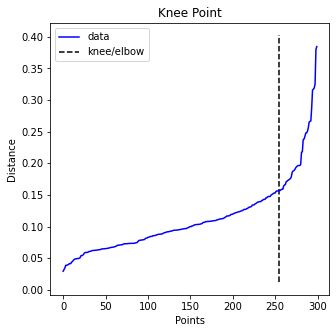

In [132]:
# find the "knee" in the distance plot
# how to interpret this plot???

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee(figsize=(5, 5))
plt.xlabel("Points")
plt.ylabel("Distance")

print("optimal eps:",distances[knee.knee])

ARI = 0.8924317433503046


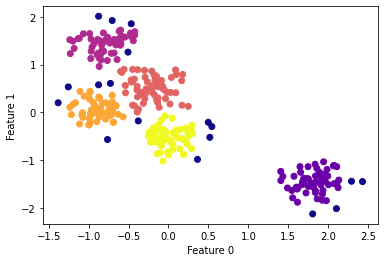

In [130]:
# use the best params combination
eps = distances[knee.knee]
min_sample = 3
dbscan = DBSCAN(eps=eps, min_samples=min_sample)
clusters = dbscan.fit_predict(X_scaled)

# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

print("ARI =", adjusted_rand_score(y, clusters))

### Homework problem 1: how do you optimize `eps` and `min_samples` using WCSS as optimized metric?

## 3. Dim reduction using PCA

#### Get toy dataset

In [133]:
# set up dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [134]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [153]:
# Separating out the features
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, features].values

# Separating out the target
y = df.loc[:,['target']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)
n_samples = x.shape[0]

#### Set up PCA and look at eigenvalues
Since original dataset only has 4 features, we will try reducing dimension to 3.

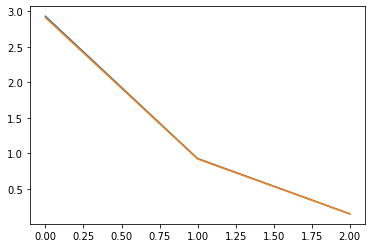

In [157]:
# set up PCA 
n_pc = 3
pca = PCA(n_components=n_pc)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc_'+str(i+1) for i in range(n_pc)])

# calculate eigenvalues
# method 1
eigenvalues = pca.explained_variance_
plt.plot(eigenvalues)

# method 2
cov_matrix = np.dot(x.T, x) / n_samples
eigenvalues_2 = []
for eigenvector in pca.components_:    
    eigenvalues_2.append(np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)))
plt.plot(eigenvalues_2)

# method 1 and 2 should give similar/same results

#### Look at variance explained

Text(0.5, 1.0, 'Incremental variance explained by PC')

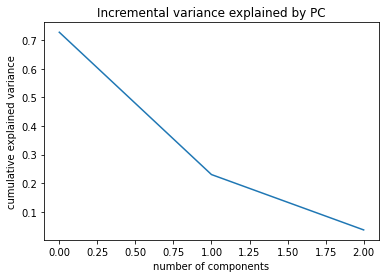

In [147]:
# plot incremental variance explained

plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Incremental variance explained by PC')

Text(0.5, 1.0, 'Cumulative variance explained by PC')

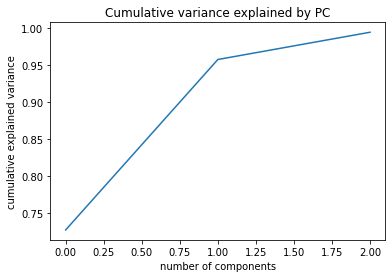

In [148]:
# plot cumulative variance explained
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Cumulative variance explained by PC')

#### Visualize data on different PCs

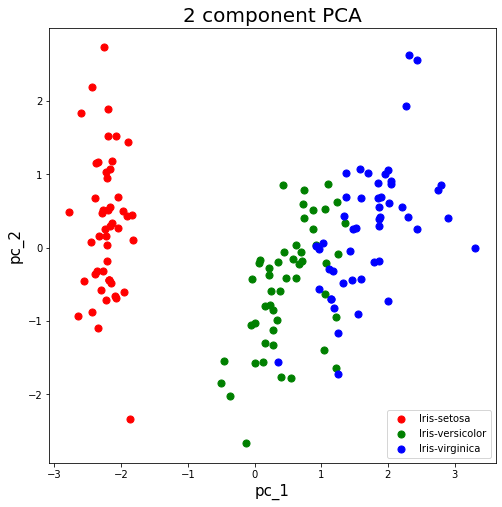

In [163]:
# visualize data on PC1 and PC2

# add in PCs to dataframe
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

# plot
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('pc_1', fontsize = 15)
ax.set_ylabel('pc_2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pc_1']
               , finalDf.loc[indicesToKeep, 'pc_2']
               , c = color
               , s = 50)
ax.legend(targets)

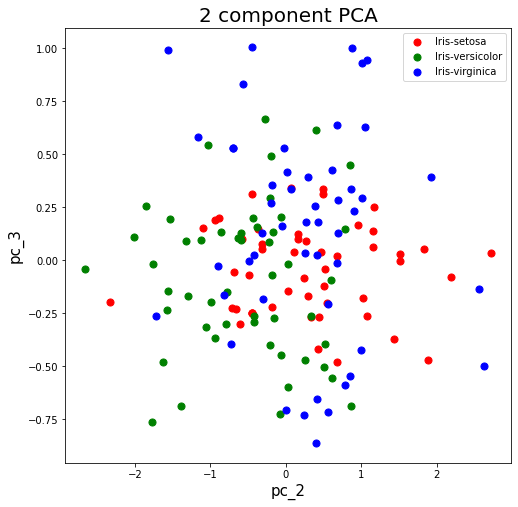

In [164]:
# plot
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('pc_2', fontsize = 15)
ax.set_ylabel('pc_3', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pc_2']
               , finalDf.loc[indicesToKeep, 'pc_3']
               , c = color
               , s = 50)
ax.legend(targets)

From the two figures above, we can tell PC1 and PC2 preserved variation in original dataset. 

For PC2 and PC3, we see very little pattern from the plot.

## 4. Using PCA to speed up modeling
Example: hand-written digits classification using MNIST dataset

In [165]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# fetch data
mnist = fetch_openml('mnist_784')

In [177]:
# train-test split
# test_size: what proportion of original data is used for test set

test_size = 0.2
random_state = 123

train_img, test_img, train_lbl, test_lbl = train_test_split(mnist.data, mnist.target, 
                                                            test_size=test_size, random_state=random_state)

In [178]:
# check original dimension
train_img.shape, test_img.shape

((56000, 784), (14000, 784))

In [179]:
# standardize inputs
scaler = StandardScaler()

# Fit on training set only
scaler.fit(train_img)

# Apply transform to both the training set and the test set.
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

In [180]:
# Make an instance of the PCA, and use training data to fit

n_components = 0.95
# by definition of documentation, n_components between 0 and 1 means variance preserved

# If ``0 < n_components < 1`` and ``svd_solver == 'full'``, select the
#     number of components such that the amount of variance that needs to be
#     explained is greater than the percentage specified by n_components.

pca = PCA(n_components)
lower_dimensional_train = pca.fit_transform(train_img)

In [181]:
# check dimension
lower_dimensional_train.shape
# we have reduced dimension by more than 50% but still preserved 95% or variation

(56000, 327)

Text(0.5, 1.0, 'Cumulative variance explained by PC')

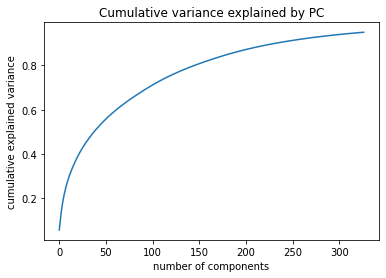

In [170]:
# plot cumulative variance explained
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Cumulative variance explained by PC')

### Visualizing lower dimenson data

Text(0.5, 1.0, '95% of Explained Variance')

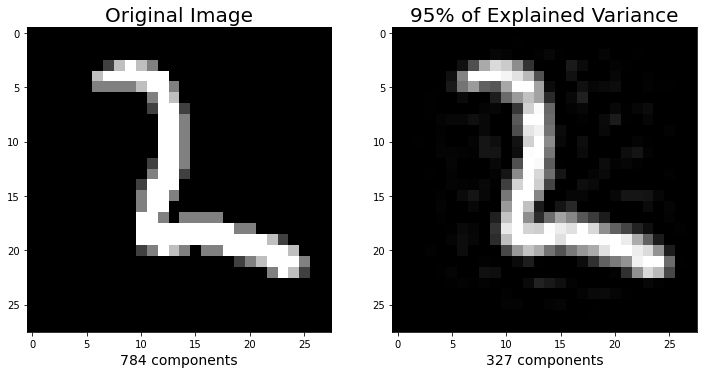

In [198]:
# to visualize in origin format, we will need to do two back transformation
# PCA -> original dimension
# standardized -> original scale

# first back transformation from PCs to original dim is done here
approximation = pca.inverse_transform(lower_dimensional_train)

# Original Image
example_id = 1

fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
# back transform standardized data to original scale 
plt.imshow(scaler.inverse_transform(train_img[example_id]).reshape(28,28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255))
plt.xlabel('784 components', fontsize = 14)
plt.title('Original Image', fontsize = 20)

# 327 principal components
plt.subplot(1, 2, 2)
# back transform standardized data to original scale 
plt.imshow(scaler.inverse_transform(approximation[example_id]).reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255))
plt.xlabel('{} components'.format(pca.n_components_), fontsize = 14)
plt.title('95% of Explained Variance', fontsize = 20)

### Use PCA components to fit model

In [176]:
from sklearn.linear_model import LogisticRegression
# you can also use statsmodels 

In [197]:
# apply PCA transformation to train and test dataset
train_img_lowdim = pca.transform(train_img)
test_img_lowdim = pca.transform(test_img)

In [ ]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow which is why it was changed to 'lbfgs'

logisticRegr = LogisticRegression(solver = 'lbfgs')

In [ ]:
# EXERCISE: please complet the code below to build and assess model

# it might be easier if you wrap this part in a function to be called repeatedly


# use the transformed PCA components to fit logistic regression models


# use fitted model to predict test data labels


# use some metric to measure model classification performance on test dataset

### Homework problem 2: Can you explore how the data visualization and logistic regression model performance change with different number of PC in PCA? Change # of PC for a few values and compare model performance.